<a href="https://colab.research.google.com/github/paintdaworld/Auto-GPT/blob/master/ChatGPT_ML_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guided Project**
**Machine Learning with ChatGPT: Image Classification Model**

Author: [Jousef Murad](https://www.linkedin.com/in/jousefmurad/)

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the MNIST dataset and split it into training, validation, and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_valid = x_train[:48000], x_train[48000:]
y_train, y_valid = y_train[:48000], y_train[48000:]

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_valid = x_valid.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model with validation
batch_size = 128
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_valid, y_valid))

# Define a function to plot 20 random images from the training set
def plot_images():
    # Get 20 random indices from the training set
    indices = np.random.randint(0, len(x_train), size=20)

    # Get the corresponding images and labels
    images = x_train[indices]
    labels = y_train[indices]

    # Make predictions on the images
    predictions = model.predict(images)

    # Plot the images with their true and predicted labels
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))
    fig.suptitle('Random images with true and predicted labels', fontsize=16)
    for i, ax in enumerate(axes.flat):
        # Plot the image
        ax.imshow(images[i].reshape(28, 28), cmap='gray')

        # Get the true label
        true_label = np.argmax(labels[i])

        # Get the predicted label
        predicted_label = np.argmax(predictions[i])

        # Color code the label based on whether the prediction was correct or not
        if true_label == predicted_label:
            color = 'green'
        else:
            color = 'red'

        # Add the true and predicted label


11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                         

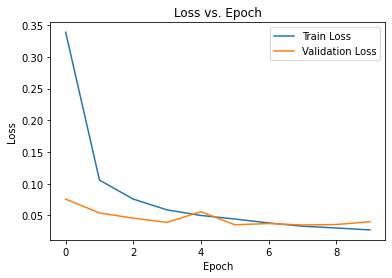

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss function and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

In [ ]:
def plot_images():
    # Get 20 random indices from the training set
    indices = np.random.randint(0, len(x_train), size=20)

    # Get the corresponding images and labels
    images = x_train[indices]
    true_labels = y_train[indices]

    # Make predictions on the images
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Create a grid of subplots with the specified spacing
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8), gridspec_kw={'wspace': 0.3, 'hspace': 0.6})
    fig.suptitle('Random images with true and predicted labels', fontsize=16)

    # Plot each image and its true/predicted label on a subplot
    for i, ax in enumerate(axes.flat):
        # Plot the image
        ax.imshow(images[i].reshape(28, 28), cmap='gray')

        # Get the true and predicted labels
        true_label = np.argmax(true_labels[i])
        predicted_label = predicted_labels[i]

        # Color code the label based on whether the prediction was correct or not
        if true_label == predicted_label:
            color = 'green'
        else:
            color = 'red'

        # Add the true and predicted labels to the image
        ax.set_xlabel(f'True: {true_label}\nPredicted: {predicted_label}', color=color, fontsize=12)

        # Remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])

    # Show the plot
    plt.show()


1/1 [==============================] - 0s 47ms/step


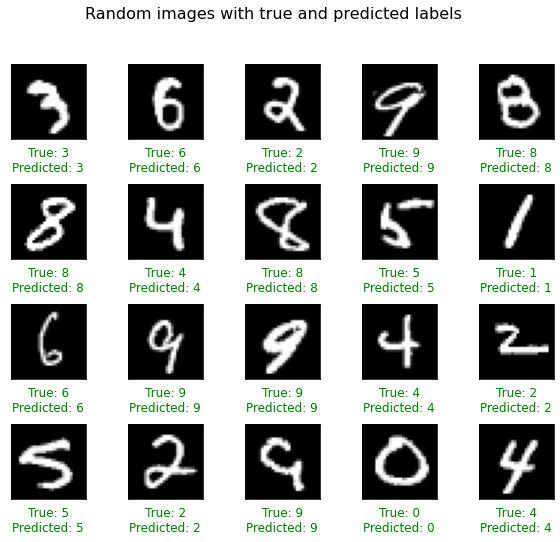

In [ ]:
plot_images()

In [ ]:
def plot_images():
    # Get 20 random indices from the training set
    indices = np.random.randint(0, len(x_train), size=20)

    # Get the corresponding images and labels
    images = x_train[indices]
    true_labels = y_train[indices]

    # Make predictions on the images
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Find the indices of the incorrect predictions
    incorrect_indices = np.where(predicted_labels != np.argmax(true_labels, axis=1))[0]

    # Create a grid of subplots with the specified spacing
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8), gridspec_kw={'wspace': 0.3, 'hspace': 0.6})
    fig.suptitle('Incorrectly predicted images with true and predicted labels', fontsize=16)

    # Plot each incorrect image and its true/predicted label on a subplot
    plot_count = 0
    for i, ax in enumerate(axes.flat):
        # Check if there are any incorrect images left to plot
        if plot_count < len(incorrect_indices):
            # Get the index of the next incorrect image
            index = incorrect_indices[plot_count]

            # Plot the image
            ax.imshow(images[index].reshape(28, 28), cmap='gray')

            # Get the true and predicted labels
            true_label = np.argmax(true_labels[index])
            predicted_label = predicted_labels[index]

            # Add the true and predicted labels to the image
            ax.set_xlabel(f'True: {true_label}\nPredicted: {predicted_label}', color='red', fontsize=12)

            # Increment the plot count
            plot_count += 1

        # If all the incorrect images have already been plotted, clear the subplot
        else:
            ax.clear()

        # Remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])

    # Show the plot
    plt.show()


1/1 [==============================] - 0s 149ms/step


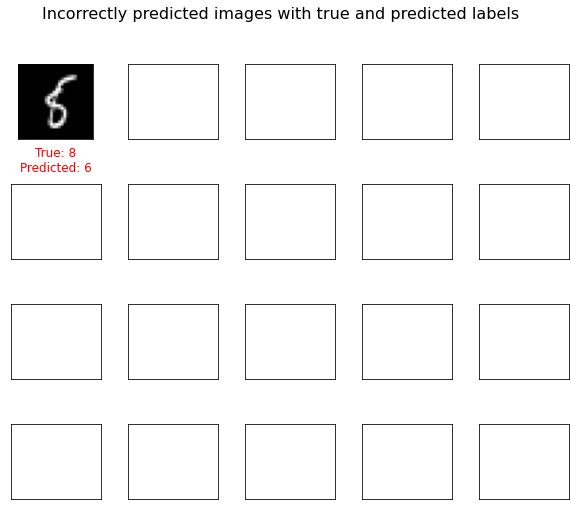

In [ ]:
plot_images()

# Capstone Exercises
### Feel free to adapt the code however you want. This is just an example how to solve a particular problem. Of course there are multiple ways to do that!

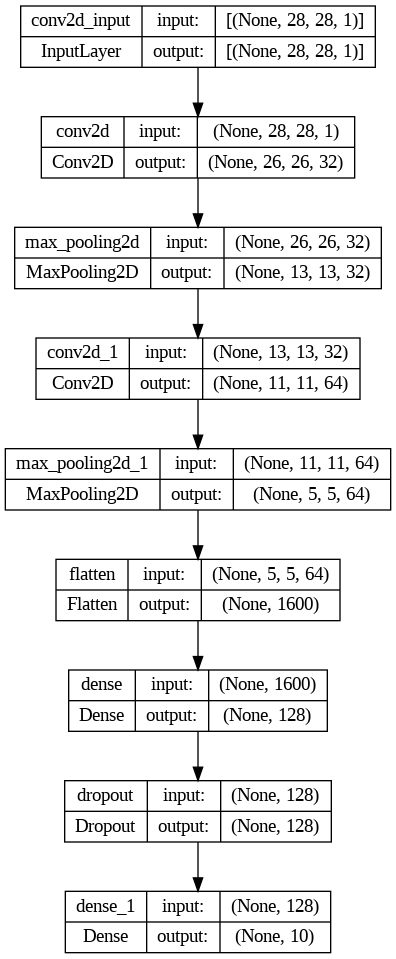

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the model's structure
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get the predicted labels from the model's output probabilities
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Convert multilabel-indicator labels to multiclass labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=-1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the classification report
print(classification_report(y_test, y_pred))


313/313 [==============================] - 7s 23ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      1.00       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



313/313 [==============================] - 7s 21ms/step


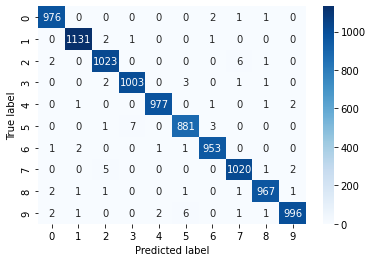

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the predicted labels from the model's output probabilities
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Convert multilabel-indicator labels to multiclass labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=-1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Set the plot labels
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
